In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
# Preprocess the dataset
# Remove any rows with missing values
df.dropna(inplace=True)

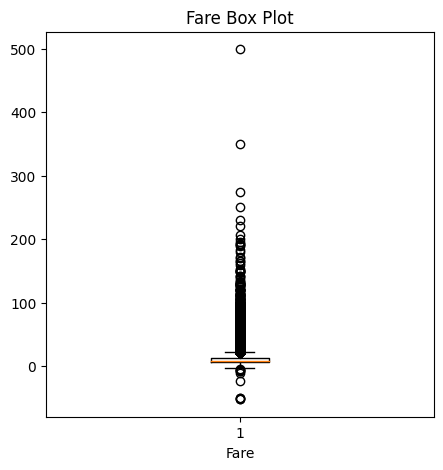

In [7]:
# Identify outliers in the 'fare' column using a box plot
plt.figure(figsize=(5, 5))
plt.boxplot(df['fare_amount'])
plt.title('Fare Box Plot')
plt.xlabel('Fare')
plt.show()

In [8]:
# Remove outliers in the 'fare' column (you can adjust the threshold as needed)
#Remove Outliers
q_low = df["fare_amount"].quantile(0.01)
q_hi  = df["fare_amount"].quantile(0.99)

df = df[(df["fare_amount"] < q_hi) & (df["fare_amount"] > q_low)]

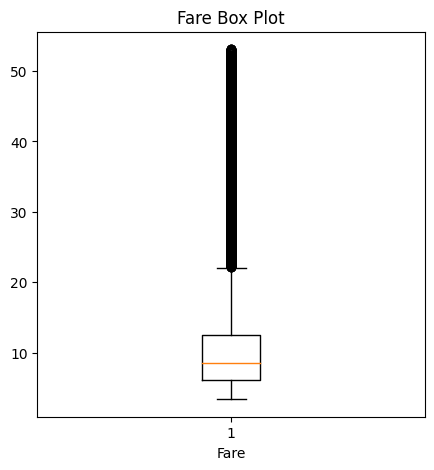

In [9]:
# Identify outliers in the 'fare' column using a box plot
plt.figure(figsize=(5, 5))
plt.boxplot(df['fare_amount'])
plt.title('Fare Box Plot')
plt.xlabel('Fare')
plt.show()

In [10]:
# Check the correlation between the features
# For example, we can use the following code to generate a correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

                   Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
Unnamed: 0           1.000000    -0.000339         -0.000209        -0.000028   
fare_amount         -0.000339     1.000000          0.006534        -0.004843   
pickup_longitude    -0.000209     0.006534          1.000000        -0.810943   
pickup_latitude     -0.000028    -0.004843         -0.810943         1.000000   
dropoff_longitude   -0.000107     0.006012          0.832846        -0.773097   
dropoff_latitude     0.000647    -0.007651         -0.846712         0.697275   
passenger_count      0.002241     0.012145         -0.000737        -0.001288   

                   dropoff_longitude  dropoff_latitude  passenger_count  
Unnamed: 0                 -0.000107          0.000647         0.002241  
fare_amount                 0.006012         -0.007651         0.012145  
pickup_longitude            0.832846         -0.846712        -0.000737  
pickup_latitude            -0.773097          0.697275 

C:\Users\HP\AppData\Local\Temp\ipykernel_7724\1291692218.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [11]:
# Check the correlation between the features
# For example, we can use the following code to generate a correlation matrix



#numeric_df=df.select_dtypes(include=['number'])
#corr_matrix = numeric_df.corr()
#print(corr_matrix)

In [12]:
# Select the most important features
# For example, we can select the features that have a correlation of greater than 0.5 with the target variable
features = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

In [13]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['fare_amount'], test_size=0.25, random_state=42)

In [14]:
# Train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Train the random forest regression model
random_forest_regression_model = RandomForestRegressor()
random_forest_regression_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
# Make predictions on the test set
linear_regression_predictions = linear_regression_model.predict(X_test)
random_forest_regression_predictions = random_forest_regression_model.predict(X_test)

In [23]:
random_forest_regression_predictions

array([ 6.1397,  8.55  , 11.282 , ..., 26.478 ,  8.64  ,  6.742 ])

In [22]:
linear_regression_predictions

array([10.89314894, 10.89332991, 10.89293114, ..., 11.13438138,
       10.89366614, 10.89380708])

In [17]:
# Evaluate the models
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
linear_regression_rmse = mean_squared_error(y_test, linear_regression_predictions)**0.5

In [18]:
random_forest_regression_r2 = r2_score(y_test, random_forest_regression_predictions)
random_forest_regression_rmse = mean_squared_error(y_test, random_forest_regression_predictions)**0.5

In [19]:
# Create a new DataFrame for the predictions
predictions_df = pd.DataFrame({'LinearRegression_Predicted_Price': linear_regression_predictions,
                               'RandomForest_Predicted_Price': random_forest_regression_predictions})

# Concatenate the predictions DataFrame with the original DataFrame
df = pd.concat([df, predictions_df], axis=1)

# Display the updated DataFrame
print(df)

       Unnamed: 0                            key  fare_amount  \
0      24238194.0    2015-05-07 19:52:06.0000003          7.5   
1      27835199.0    2009-07-17 20:04:56.0000002          7.7   
2      44984355.0   2009-08-24 21:45:00.00000061         12.9   
3      25894730.0    2009-06-26 08:22:21.0000001          5.3   
4      17610152.0  2014-08-28 17:47:00.000000188         16.0   
...           ...                            ...          ...   
48519         NaN                            NaN          NaN   
48615         NaN                            NaN          NaN   
48682         NaN                            NaN          NaN   
48696         NaN                            NaN          NaN   
48715         NaN                            NaN          NaN   

               pickup_datetime  pickup_longitude  pickup_latitude  \
0      2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1      2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2      2009-

In [20]:
# Print the results
print('Linear regression:')
print('R2:', linear_regression_r2)
print('RMSE:', linear_regression_rmse)

Linear regression:
R2: 0.00025997597007687556
RMSE: 8.091866021814223


In [21]:
print('Random forest regression:')
print('R2:', random_forest_regression_r2)
print('RMSE:', random_forest_regression_rmse)

Random forest regression:
R2: 0.8014958617539406
RMSE: 3.6057027936860306
